In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('Bank customers.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
bank.shape

(10127, 21)

In [4]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# So we will need to extract data from Income_category columns and other categorical columns, since as you see the data 
# is in string format and the range is giving, not an exact value which can be feeded into the model directly

# So this is why we convert into numerical value by the label encoded, one heart encoded etc

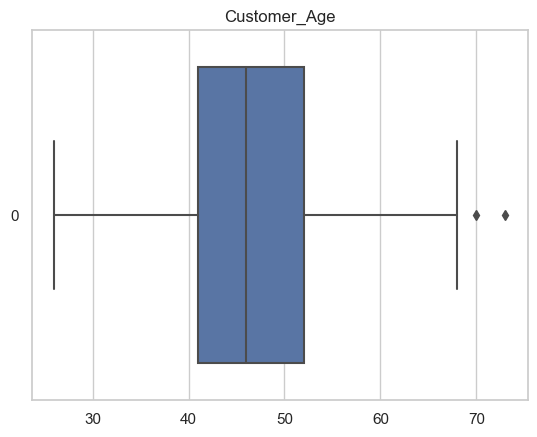

In [7]:
sns.set_theme(style='whitegrid')
sns.boxplot(bank['Customer_Age'], orient='h')
plt.title('Customer_Age')
plt.show()

In [8]:
# most of the customers are  somewhere near 45 years age, some outlier that are depicted by the dots on the right hand side 
# at the age 70 and maybe 75

In [9]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [11]:
bank[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [12]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [13]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [14]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [15]:
bank_marital = bank.groupby('Marital_Status')

In [16]:
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [17]:
# Now lets move forward and see if we have categorical data in our dataset

In [18]:
bank.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [19]:
bank['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [21]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [22]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [23]:
bank['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [24]:
bank['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [25]:
def ref1(x):
    if x== 'M':
        return 1
    else:
        return 0
bank['Gender'] = bank['Gender'].map(ref1)

In [26]:
bank['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [27]:
def ref2(x):
    if x =='Existing Customer':
        return 1
    else:
        return 0
bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [28]:
bank['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [29]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##  "          Here i would have done 3 type of same method just look at this        "

In [30]:
# converting categorical data int numerical value 
y = bank['Card_Category'] # This is the dependent variable
x = bank.copy()

In [31]:
x.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [32]:
x['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

### 1st Method for understanding purpose

In [33]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name , le.classes_)
    return le.transform(feat)

In [34]:
x['Income_Category'] = label_encoder(x['Income_Category'])
x.head()

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 2nd Method which i came up with an idea  

In [35]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    le = LabelEncoder()
    le.fit_transform(feat)
    return le.fit_transform(feat)

In [36]:
x['Income_Category'] = label_encoder(x['Income_Category'])
x.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 3rd Method this was chatgpt code (much simplified code)

In [37]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    return LabelEncoder().fit_transform(feat)

In [38]:
x['Income_Category'] = label_encoder(x['Income_Category'])
x.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [39]:
x['Income_Category'].value_counts()

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

In [40]:
# NOTE :- now for the next categorical value 'Education_Level' , 'Marital_Status' these has more than 2 unique values
#                                             so in this case for tree based model we will use LabelEncoder where as 
#                                             if we use logistic regression OR linear regression then we will go for 
#                                             One-Hot-Encoder 
#                                             "(linear based model) - One-Hot-Encoder, (tree based) - LabelEncoder"



#      from sklearn.linear_model import 'the linear based model name' -- linear family


#      from sklearn.tree import DecisionTreeClassifier  -- For classification
#      from sklearn.tree import DecisionTreeRegressor   -- For regression

#      from sklearn.ensemble import RandomForestClassifier  -- For classification
#      from sklearn.ensemble import RandomForestRegressor   -- For regression

#      from sklearn.ensemble import GradientBoostingClassifier  -- For classification
#      from sklearn.ensemble import GradientBoostingRegressor   -- For regression


# why we don't do ONE-HOT-ENCODER in tree based model is it will create an overfitting model 

In [41]:
x['Education_Level'] = label_encoder(x['Education_Level'])
x['Marital_Status'] = label_encoder(x['Marital_Status'])
x.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [43]:
# Now we drop the unique column which is "CLIENTNUM" and then we will drop the dependant variable "Card_Category"

x = x.drop(['CLIENTNUM' , 'Card_Category'], axis=1)
x.shape

(10127, 19)

In [44]:
y.value_counts() # it is an imbalance dataset -- so we can do some technique to make it balance (smot technique ,statified 
                                                                                                # technique)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [45]:
# we will do statified technique here 

In [46]:
y = bank[['Card_Category']]
y

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
...,...
10122,Blue
10123,Blue
10124,Blue
10125,Blue


In [47]:
y['Card_Category'] = label_encoder(y['Card_Category'])
y.head()

,Card_Category
0,0
1,0
2,0
3,0
4,0


In [48]:
y['Card_Category'].value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

In [49]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


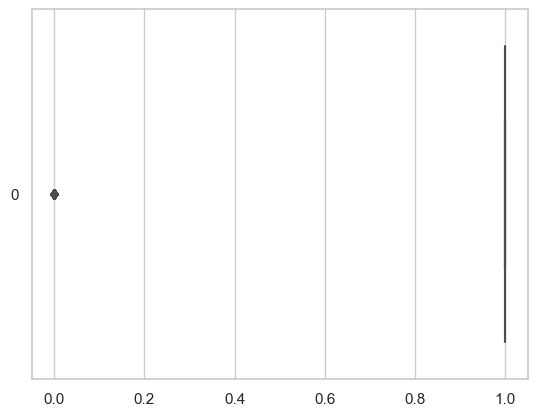

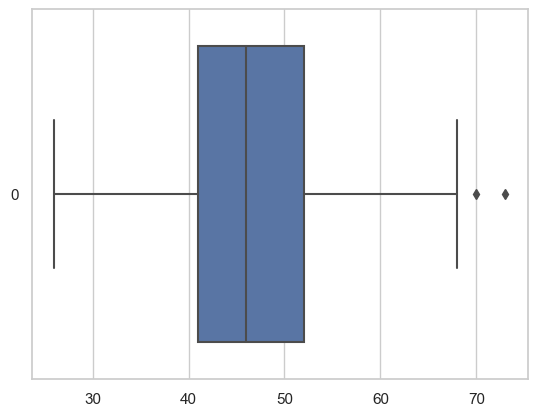

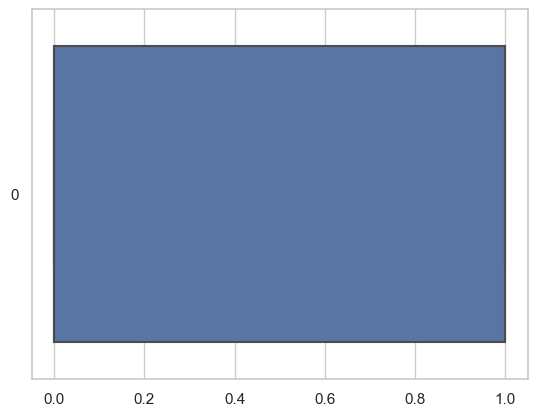

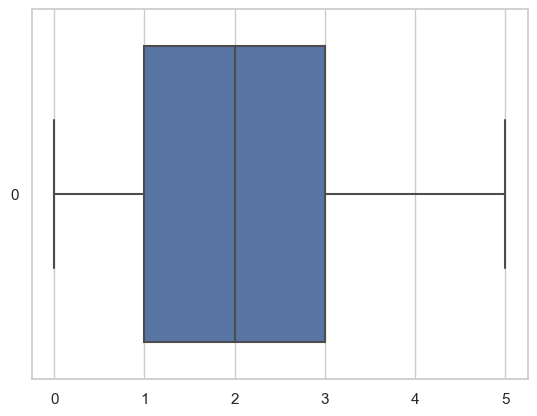

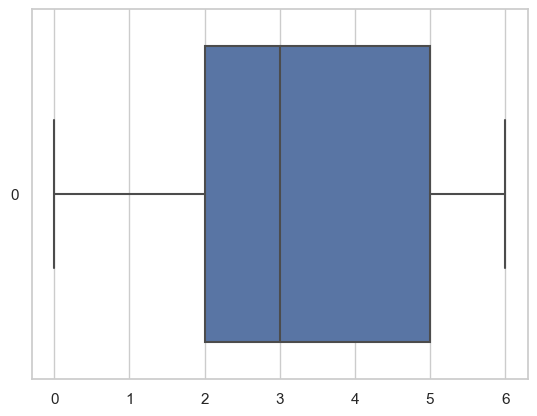

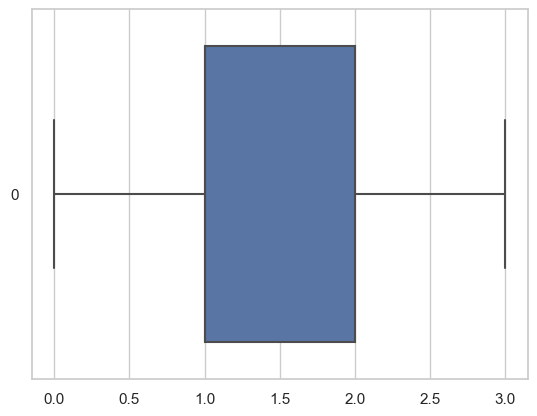

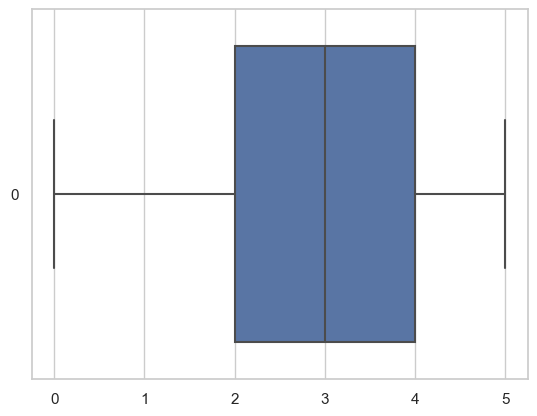

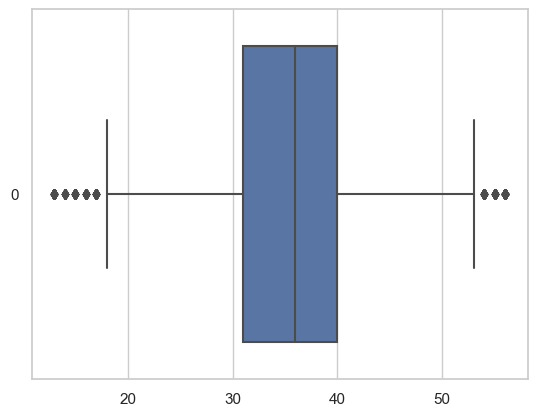

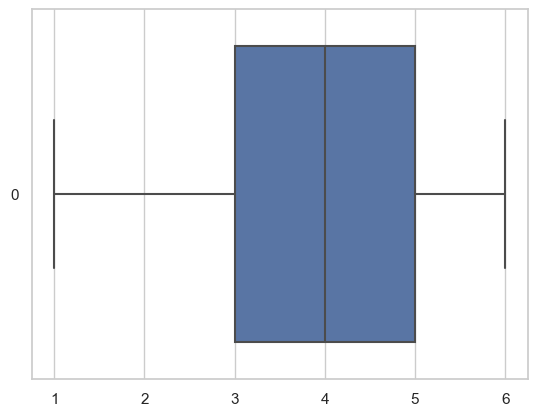

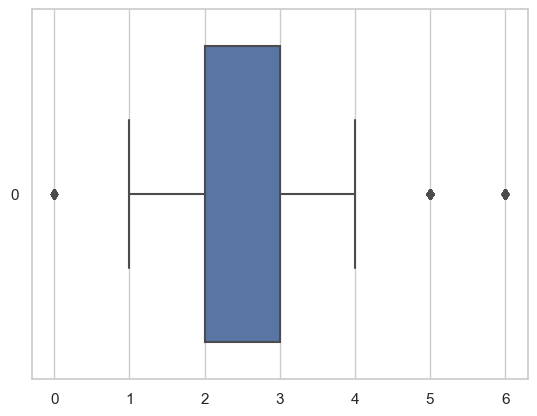

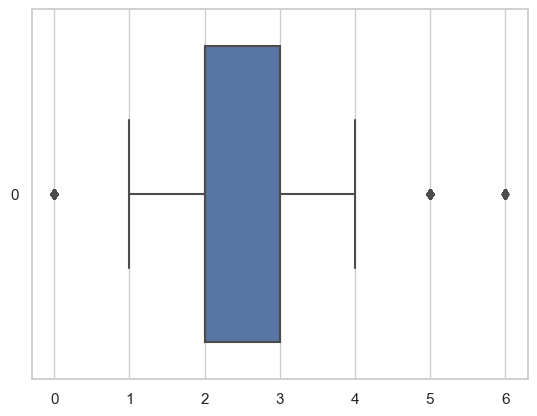

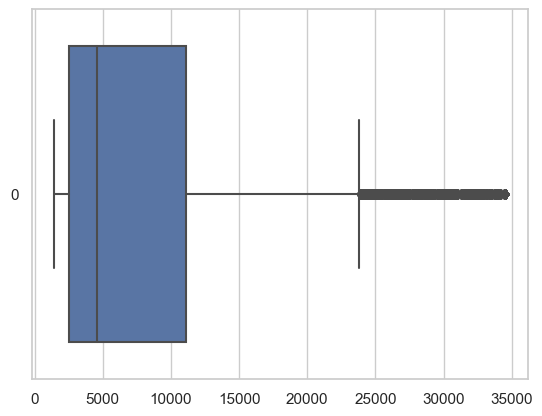

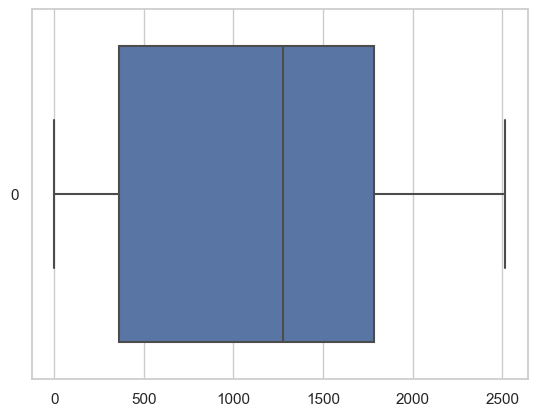

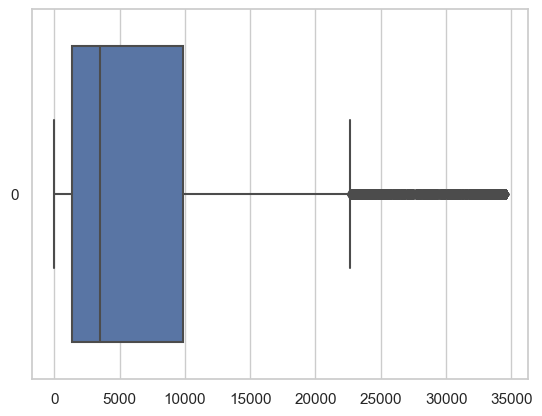

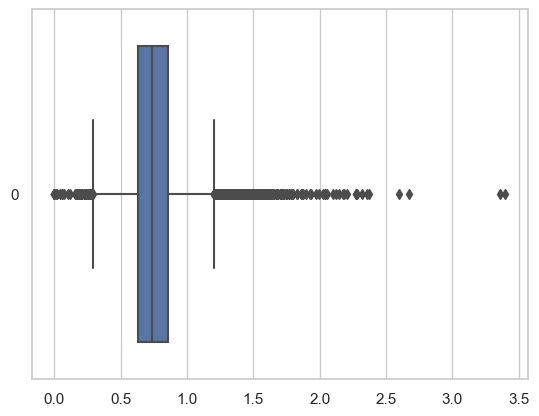

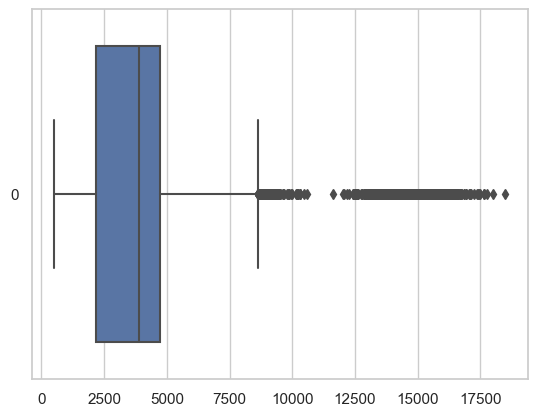

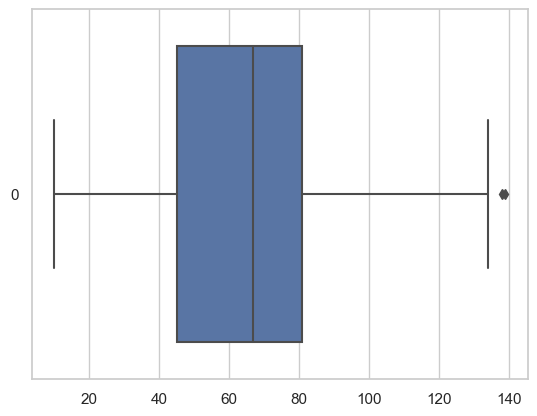

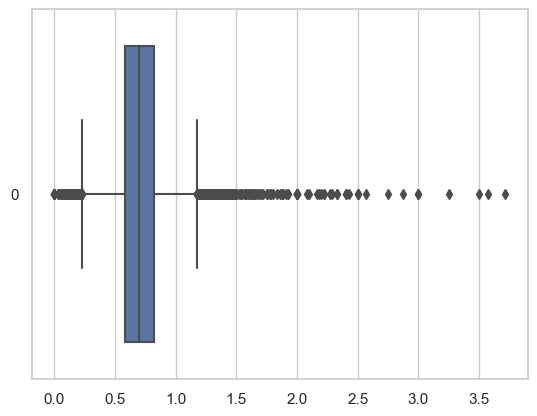

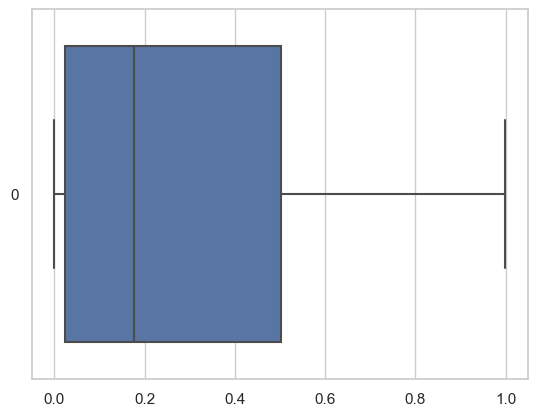

In [50]:
# Outliers

def boxplot(col):
    sns.boxplot(x[col], orient='h')
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)

In [51]:
# Let's check the number of outlier's per columns

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print(UL)
print()
print(LL)

Attrition_Flag                  1.000
Customer_Age                   68.500
Gender                          2.500
Dependent_count                 6.000
Education_Level                 9.500
Marital_Status                  3.500
Income_Category                 7.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_Trans_Ct                135.000
Total_Ct_Chng_Q4_Q1             1.172
Avg_Utilization_Ratio           1.223
dtype: float64

Attrition_Flag                  1.000
Customer_Age                   24.500
Gender                         -1.500
Dependent_count                -2.000
Education_Level                -2.500
Marital_Status                 -0.500
Income_Category                -1.

In [52]:
((x>UL) | (x<LL)).sum()

Attrition_Flag              1627
Customer_Age                   2
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Months_on_book               386
Total_Relationship_Count       0
Months_Inactive_12_mon       331
Contacts_Count_12_mon        629
Credit_Limit                 984
Total_Revolving_Bal            0
Avg_Open_To_Buy              963
Total_Amt_Chng_Q4_Q1         396
Total_Trans_Amt              896
Total_Trans_Ct                 2
Total_Ct_Chng_Q4_Q1          394
Avg_Utilization_Ratio          0
dtype: int64

In [53]:
# Now we r gonna use capping method dont use trimming method

In [54]:
x[((x>UL) | (x<LL))] = np.NaN

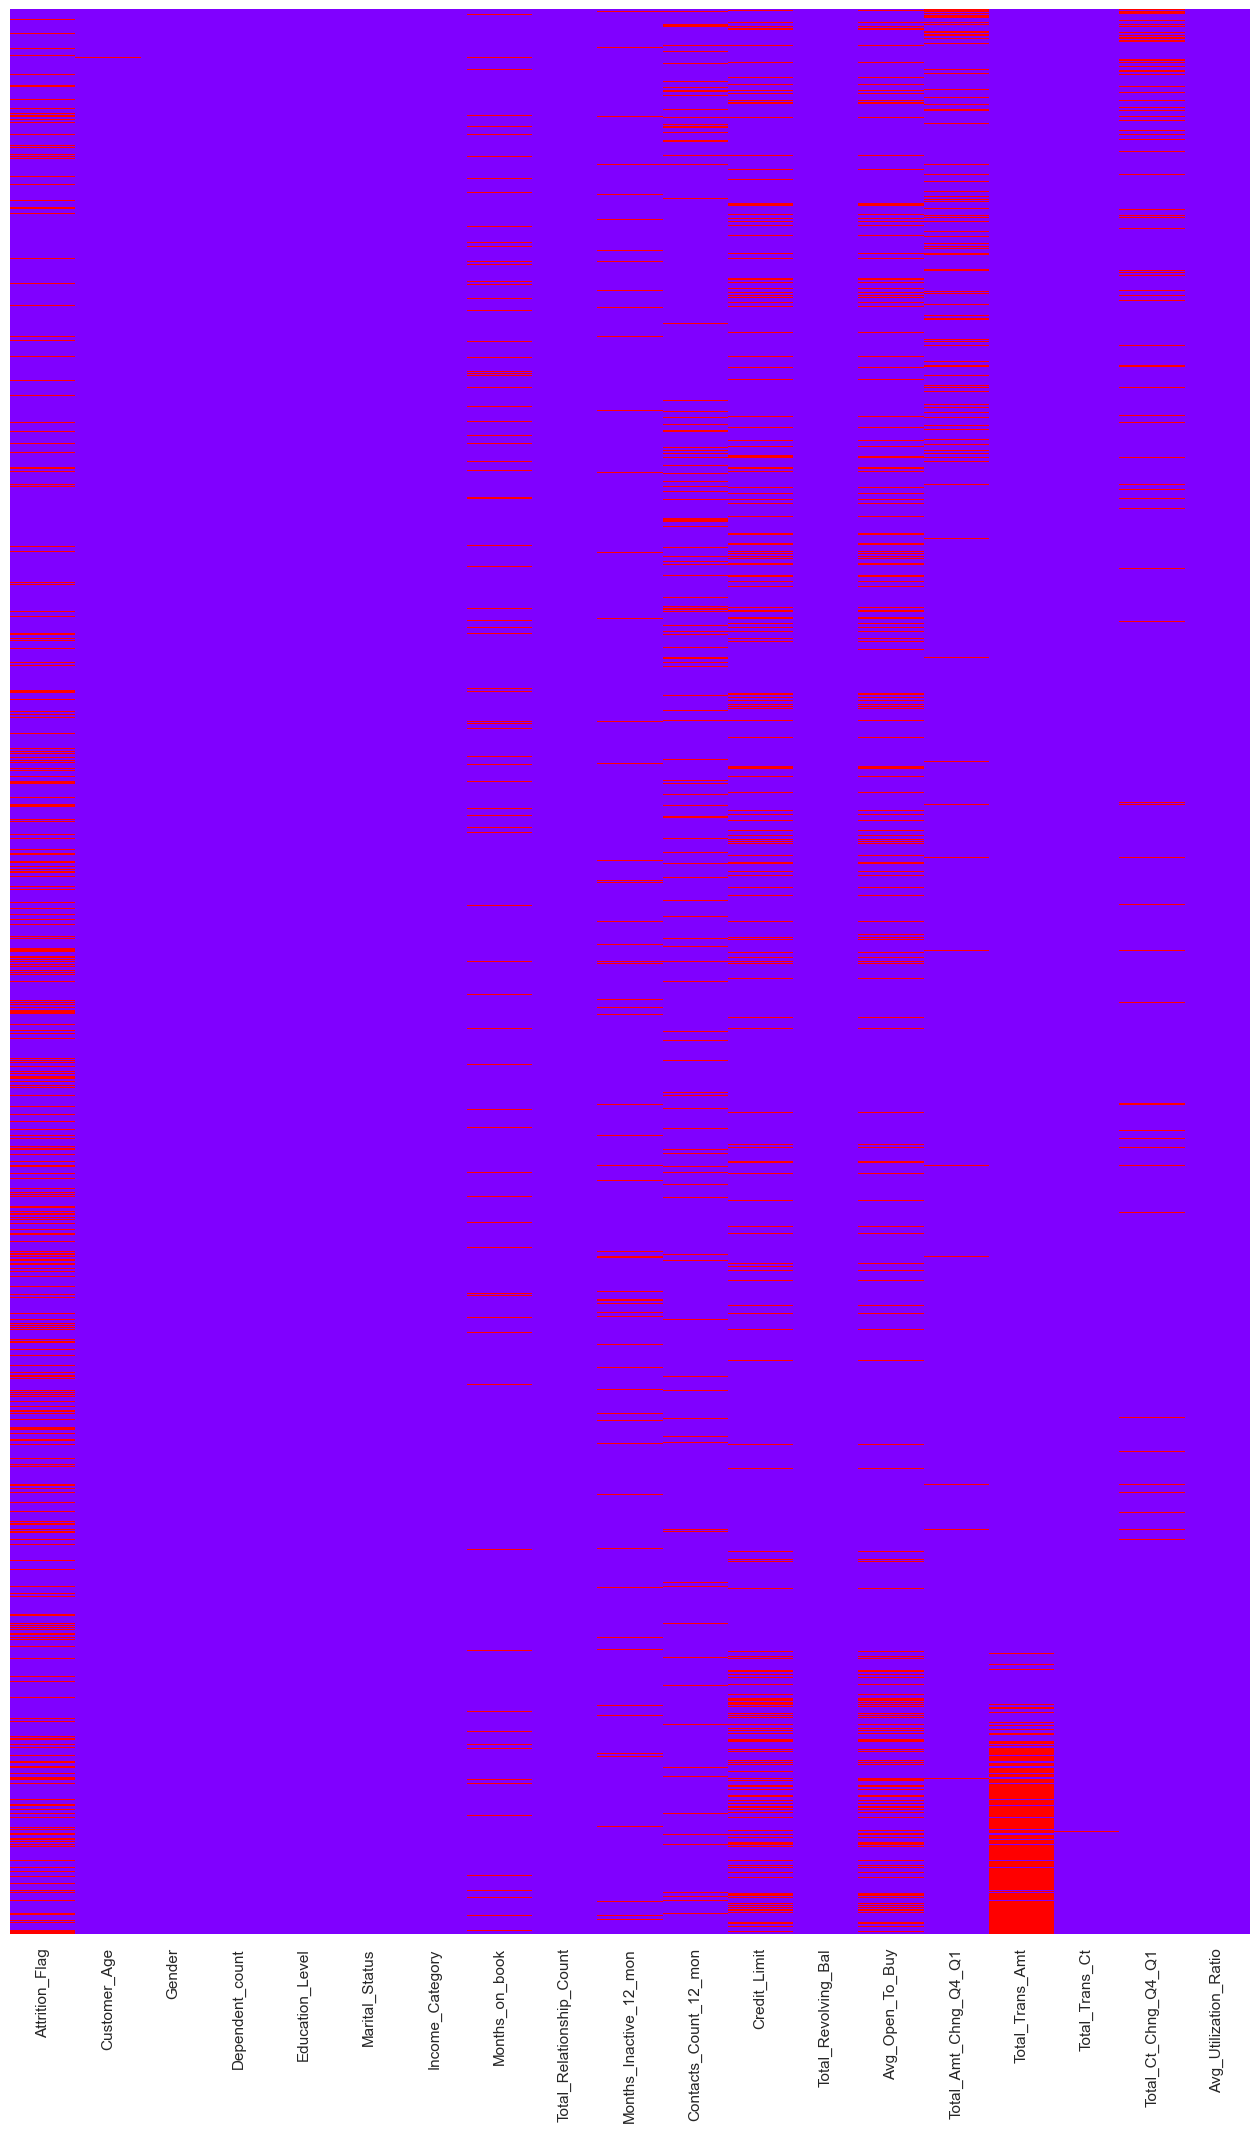

In [55]:
plt.figure(figsize=(16,25))
sns.heatmap(x.isnull(), cbar=False, cmap='rainbow', yticklabels=False)
plt.show()

In [56]:
# So here where ever the red lines are there, that is the outlier

In [57]:
# Applying capping method by using KNN imputation

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,0.7828,1144.0,42.0,0.8412,0.061
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,0.7648,1291.0,33.0,0.7442,0.105
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,36.0,4.0,1.0,2.8,3418.0,0.0,3418.0,0.7050,1887.0,20.0,0.5718,0.000
3,1.0,40.0,0.0,4.0,3.0,3.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,0.8256,1171.0,20.0,0.8286,0.760
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,21.0,5.0,1.0,3.2,4716.0,0.0,4716.0,0.8498,816.0,28.0,0.8014,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,50.0,1.0,2.0,2.0,2.0,1.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.7030,4724.2,117.0,0.8570,0.462
10123,1.0,41.0,1.0,2.0,6.0,0.0,1.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.8040,5210.2,69.0,0.6830,0.511
10124,1.0,44.0,0.0,1.0,3.0,1.0,4.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.8190,3423.8,60.0,0.8180,0.000
10125,1.0,30.0,1.0,2.0,2.0,3.0,1.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.5350,8395.0,62.0,0.7220,0.000


In [58]:
x_impute.isnull().sum().sum()

0

In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute), columns=x_impute.columns)

In [60]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445726,0.763943,-1.483108,0.560289,1.221012,-0.473422,1.285984,0.272150,-1.436350,-0.974253,0.837367,-0.775882
1,0.0,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162235,1.407306,-1.483108,-0.543612,0.361427,-0.366667,0.413906,0.161001,-1.354814,-1.358070,0.282046,-0.616276
2,0.0,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015820,0.120579,-1.483108,0.339509,-0.576266,-1.426858,-0.352489,-0.208260,-1.024235,-1.912473,-0.704937,-0.997155
3,0.0,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270784,-0.522785,2.064343,-1.647513,-0.596617,1.661686,-0.858148,0.536438,-1.421374,-1.912473,0.765233,1.759686
4,0.0,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133708,0.763943,-1.483108,0.781070,-0.324690,-1.426858,-0.102167,0.685872,-1.618279,-1.571302,0.609514,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.589028,-0.522785,-0.300624,0.560289,-0.462882,0.844455,-0.596640,-0.220610,0.549455,2.224226,0.927821,0.678714
10123,0.0,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560501,0.120579,-0.300624,0.560289,-0.409776,1.255524,-0.608404,0.403059,0.819021,0.177200,-0.068321,0.856458
10124,0.0,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015820,0.763943,0.881859,1.664191,-0.190373,-1.426858,0.031480,0.495683,-0.171829,-0.206618,0.704548,-0.997155
10125,0.0,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015820,0.120579,0.881859,0.560289,-0.215182,-1.426858,0.006794,-1.258001,2.585512,-0.121325,0.154952,-0.997155


In [61]:
# 1st answer

# There are certain variable do you have idea? for ex what will be the credit limit , person salary etc etc, where there is 
# no clarity or where we dont know the range then we use standardization

# If we have clarity that ecah variable we know the range for ex age ..... but we have different variable also there 
# so for that case i will prefer to go with standard scaler

# 2nd answer

# did we find outlier or not ... even though we have treated but outlier was there and where there is an outlier then we 
# should the standard scaler


In [62]:
# Split the data into training and test
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42,
                                                   stratify=y)

In [64]:
# Feature Selection 
# Techniques - Correlation analysis, DT feature importance , RF feature importance
# GDboosting feature importance, XGB feature importance , Regularization - ridge, lasso, elasticnet
# VIF - regression , permutation importance, recursive feature technique, P-Value
# PCA, LDA, T-SNA

# popular - recursive feature technique, pca

# EDA - dtale , dataprep, pandas-profiling, lux, plotly

In [65]:
!pip install dtale

In [66]:
import dtale
dtale.show(bank)

# Building ENSEMBLE model

# RandomForest Clasifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [70]:
print('*********************confusion_matrix****************************')
print(confusion_matrix(y_train, pred_train_rf))
print('*****************************************')
print(confusion_matrix(y_test, pred_test_rf))

*********************confusion_matrix****************************
[[7548    0    0    0]
 [   0   93    0    0]
 [   0    0   16    0]
 [   0    0    0  444]]
*****************************************
[[1886    0    0    2]
 [  21    0    0    2]
 [   3    0    0    1]
 [  88    0    0   23]]


In [71]:
print('*********************classification_report****************************')
print(classification_report(y_train, pred_train_rf))
print('*****************************************')
print(classification_report(y_test, pred_test_rf))

*********************classification_report****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

*****************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.82      0.21      0.33       111

    accuracy                           0.94      2026
   macro avg       0.44      0.30      0.33      2026
weighted avg       0.92      0.94      0.92      2026



In [72]:
print('*********************accuracy_score****************************')
print(accuracy_score(y_train, pred_train_rf))
print('*****************************************')
print(accuracy_score(y_test, pred_test_rf)) 

*********************accuracy_score****************************
1.0
*****************************************
0.9422507403751234


# RandomForest Classifier with feature selection part  - recursive feature technique

In [73]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=11, step=1)
feature_1 = feature_1.fit(x_train,y_train )

In [74]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [77]:
print('*********************accuracy_score****************************')
print(accuracy_score(y_train, pred_train_rf1))
print('*****************************************')
print(accuracy_score(y_test, pred_test_rf1)) 

*********************accuracy_score****************************
1.0
*****************************************
0.9447186574531096


In [78]:
# Cross Validation Method  
from sklearn.model_selection import cross_val_score  
rf_rfe_training =cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.94697904 0.94567901 0.95061728 0.9382716  0.94567901 0.94074074
 0.95185185 0.94814815 0.95185185 0.95432099]

0.9474139532051573


# PCA Method